In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os

In [3]:
path = '/Users/zcaspar/codes/Diagnostics/'

In [57]:
ds = [xr.open_dataset(file) for file in sorted(glob(path+'jet*1000j/'+'ZC__*'))]

In [141]:
number = len(ds)
cmap_Ta = plt.get_cmap('Greys')
cmap_Te = plt.get_cmap('Blues')
cmap_Tl = plt.get_cmap('Reds')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0, 1, number)]
colors_Te = [cmap_Te(i) for i in np.linspace(0, 1, number)]
colors_Tl = [cmap_Tl(i) for i in np.linspace(0, 1, number)]

(0.0, 50.0)

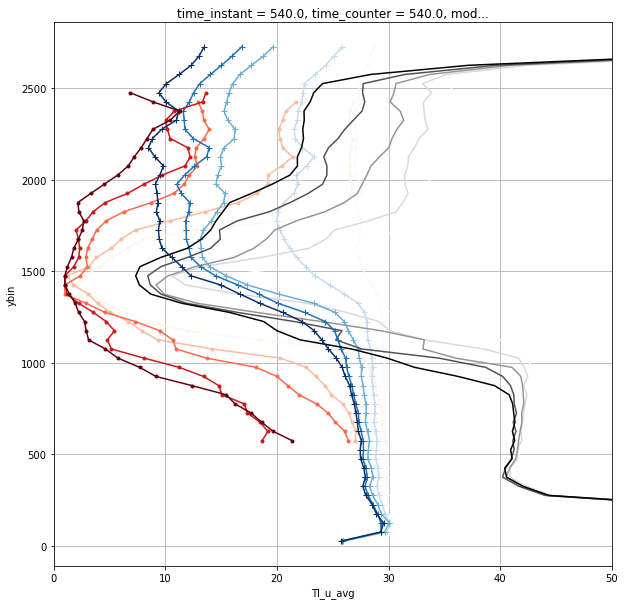

In [151]:
fig,ax = plt.subplots(figsize=(10,10))
for i,d in enumerate(ds):
    d['Ta'].plot(ax=ax,y='ybin',c=colors_Ta[i])
    d['Te_u_avg'].plot(ax=ax,y='ybin',c=colors_Te[i],marker='+')
    d['Tl_u_avg'].plot(ax=ax,y='ybin',c=colors_Tl[i],marker='.')
ax.grid();ax.set_xlim(0,50)

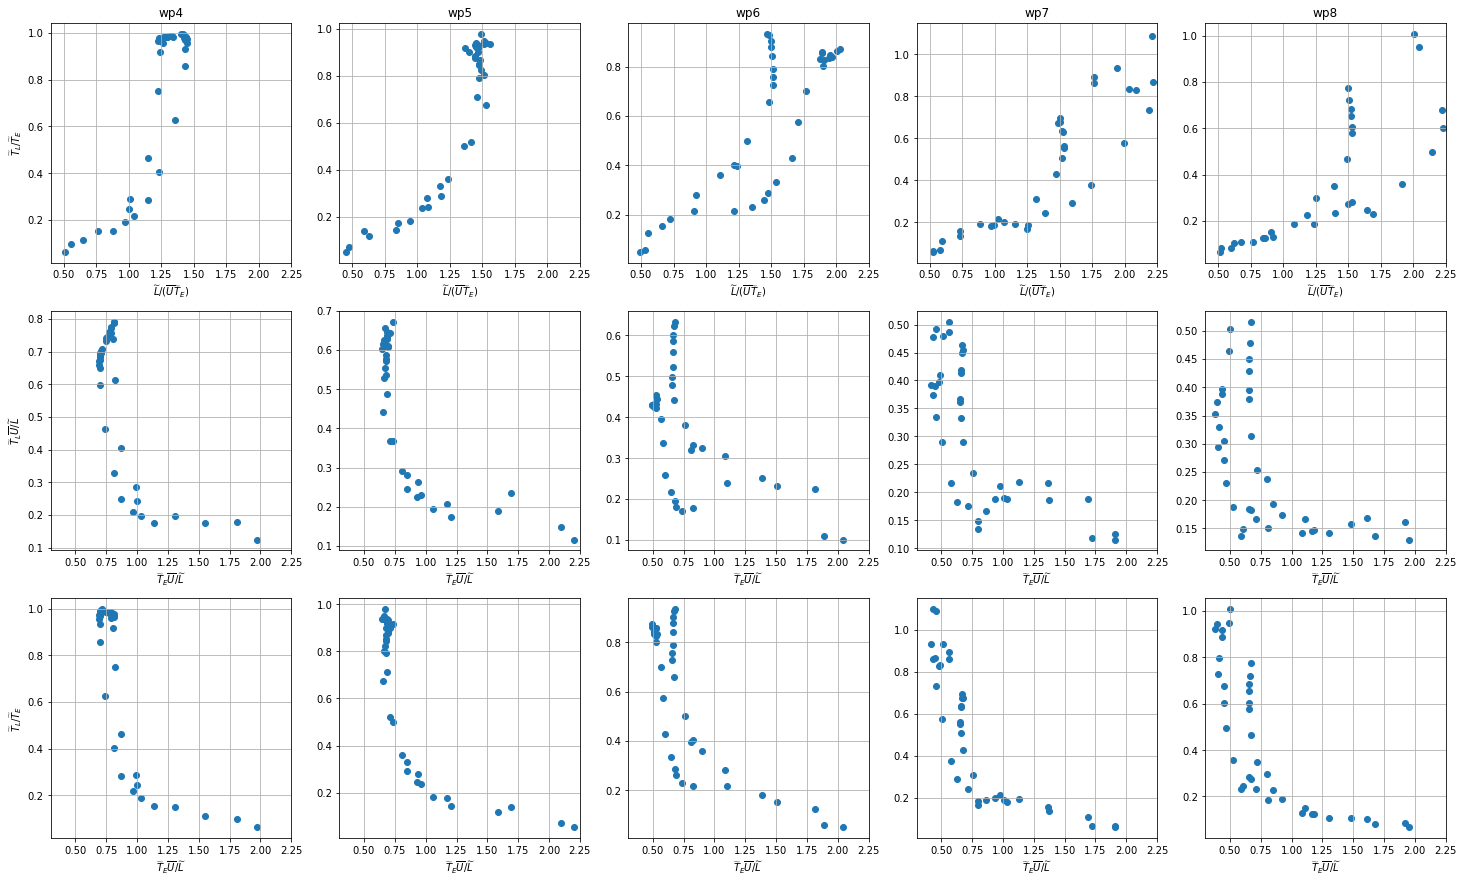

In [75]:
fig,ax = plt.subplots(3,len(ds),figsize=(5*len(ds),15))
for i,d in enumerate(ds):#,['wp4,wp5,wp6,wp7,wp8']):
    x = d['Ta']/d['Te_u_avg']
    y = d['Tl_u_avg']/d['Te_u_avg']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[0,i].scatter(x,y);ax[0,i].set_title('wp'+wp)
    ax[0,i].grid();ax[0,i].set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax[0,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    x = d['Te_u_avg']/d['Ta']
    y = d['Tl_u_avg']/d['Ta']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[1,i].scatter(x,y)
    ax[1,i].grid();ax[1,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[1,0].set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')
    x = d['Te_u_avg']/d['Ta']
    y = d['Tl_u_avg']/d['Te_u_avg']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[2,i].scatter(x,y)
    ax[2,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[2,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax[2,i].grid();ax[2,i].set_xlim(0.3,2.25);ax[1,i].set_xlim(0.3,2.25);ax[0,i].set_xlim(0.4,2.25)

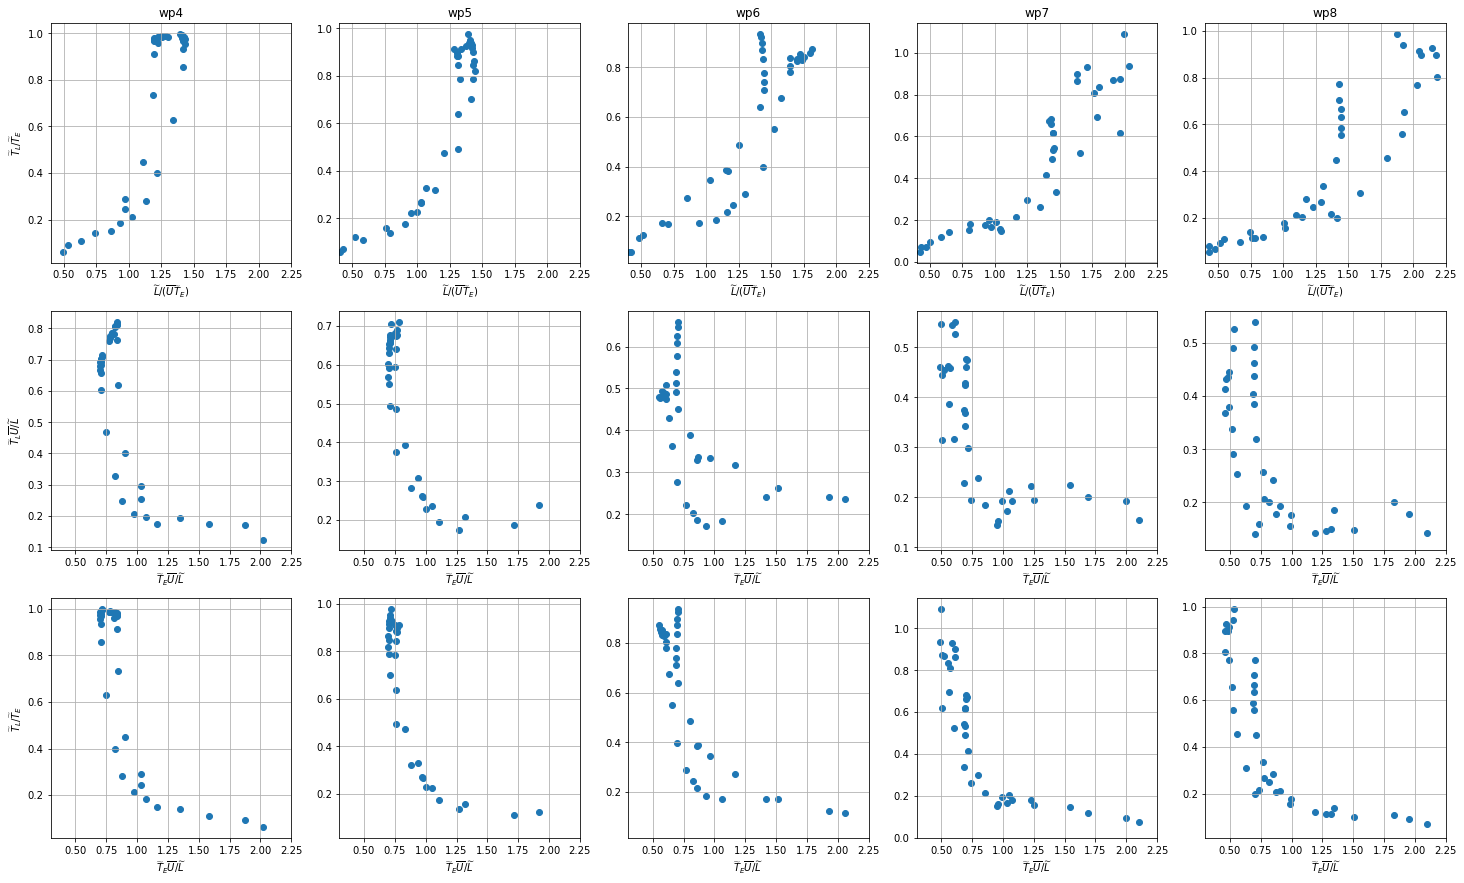

In [130]:
#Derived from v
fig,ax = plt.subplots(3,len(ds),figsize=(5*len(ds),15))
for i,d in enumerate(ds):#,['wp4,wp5,wp6,wp7,wp8']):
    x = d['Ta']/d['Te_v_avg']
    y = d['Tl_v_avg']/d['Te_v_avg']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[0,i].scatter(x,y);ax[0,i].set_title('wp'+wp)
    ax[0,i].grid();ax[0,i].set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax[0,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    x = d['Te_v_avg']/d['Ta']
    y = d['Tl_v_avg']/d['Ta']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[1,i].scatter(x,y)
    ax[1,i].grid();ax[1,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[1,0].set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')
    x = d['Te_v_avg']/d['Ta']
    y = d['Tl_v_avg']/d['Te_v_avg']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[2,i].scatter(x,y)
    ax[2,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[2,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax[2,i].grid();ax[2,i].set_xlim(0.3,2.25);ax[1,i].set_xlim(0.3,2.25);ax[0,i].set_xlim(0.4,2.25)

In [114]:
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

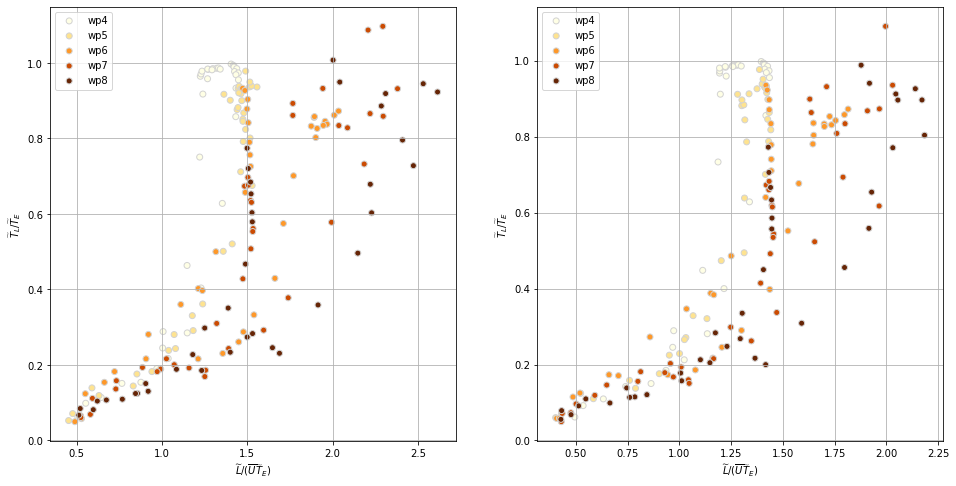

In [131]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['Te_u_avg','Tl_u_avg'],['Te_v_avg','Tl_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d['Ta']/d[V[0]]
        y = d[V[1]]/d[V[0]]
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax.set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax.grid()
    ax.legend()

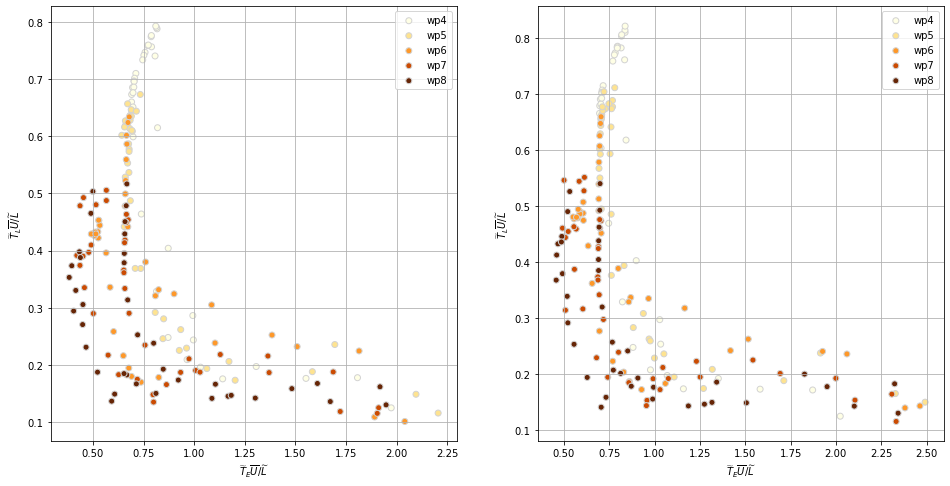

In [132]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['Te_u_avg','Tl_u_avg'],['Te_v_avg','Tl_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]]/d['Ta']
        y = d[V[1]]/d['Ta']
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax.set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')

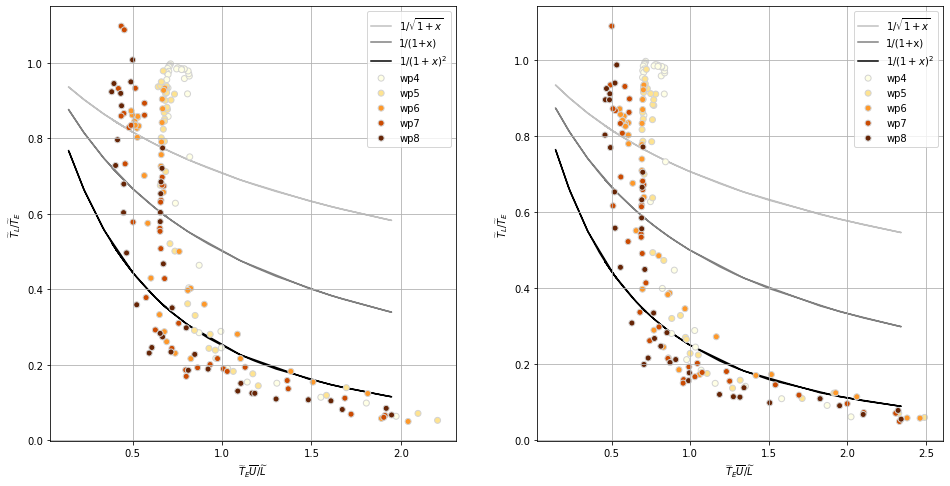

In [133]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['Te_u_avg','Tl_u_avg'],['Te_v_avg','Tl_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]]/d['Ta']
        y = d[V[1]]/d[V[0]]
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
    ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
    ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax.set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')